In [2]:
! pip install tensorflow-gpu

In [3]:
! pip install keras

In [4]:
! pip install pandas

In [5]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.1
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob


In [7]:
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score
import os
import cv2

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
file="/content/drive/My Drive/Colab Notebooks/Concrete_Strength - Copy.csv"


In [10]:
import pandas as pd
df=pd.read_csv(file)
df

,Cement (kg in a m^3 mixture),Blast Furnace Slag (kg in a m^3 mixture),Fly Ash (kg in a m^3 mixture),Water (kg in a m^3 mixture),Superplasticizer (kg in a m^3 mixture),Coarse Aggregate (kg in a m^3 mixture),Fine Aggregate (kg in a m^3 mixture),Age (day),Concrete Compressive strength(MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [11]:
df.shape

(1030, 9)

In [12]:
df.columns

Index(['Cement (kg in a m^3 mixture)',
       'Blast Furnace Slag (kg in a m^3 mixture)',
       'Fly Ash (kg in a m^3 mixture)', 'Water (kg in a m^3 mixture)',
       'Superplasticizer (kg in a m^3 mixture)',
       'Coarse Aggregate (kg in a m^3 mixture)',
       'Fine Aggregate (kg in a m^3 mixture)', 'Age (day)',
       'Concrete Compressive strength(MPa) '],
      dtype='object')

In [13]:
df.isnull().sum()

Cement (kg in a m^3 mixture)                0
Blast Furnace Slag (kg in a m^3 mixture)    0
Fly Ash (kg in a m^3 mixture)               0
Water (kg in a m^3 mixture)                 0
Superplasticizer (kg in a m^3 mixture)      0
Coarse Aggregate (kg in a m^3 mixture)      0
Fine Aggregate (kg in a m^3 mixture)        0
Age (day)                                   0
Concrete Compressive strength(MPa)          0
dtype: int64

In [14]:
df.nunique()

Cement (kg in a m^3 mixture)                278
Blast Furnace Slag (kg in a m^3 mixture)    185
Fly Ash (kg in a m^3 mixture)               156
Water (kg in a m^3 mixture)                 195
Superplasticizer (kg in a m^3 mixture)      111
Coarse Aggregate (kg in a m^3 mixture)      284
Fine Aggregate (kg in a m^3 mixture)        302
Age (day)                                    14
Concrete Compressive strength(MPa)          845
dtype: int64

In [15]:
df.dtypes

Cement (kg in a m^3 mixture)                float64
Blast Furnace Slag (kg in a m^3 mixture)    float64
Fly Ash (kg in a m^3 mixture)               float64
Water (kg in a m^3 mixture)                 float64
Superplasticizer (kg in a m^3 mixture)      float64
Coarse Aggregate (kg in a m^3 mixture)      float64
Fine Aggregate (kg in a m^3 mixture)        float64
Age (day)                                     int64
Concrete Compressive strength(MPa)          float64
dtype: object

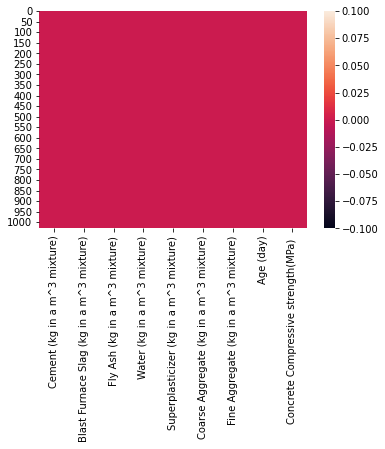

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(df.isnull())

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [18]:
X = df.drop('Concrete Compressive strength(MPa) ',axis=1)
y = df['Concrete Compressive strength(MPa) ']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [19]:
X_train.shape

(772, 8)

In [20]:
X_test.shape

(258, 8)

In [21]:
len(X_train.columns)

8

In [22]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [105]:
model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =8))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse'])
r=model.fit(X_train, y_train, epochs=500, batch_size=8,validation_data=(X_test,y_test))

Epoch 1/500
97/97 [==============================] - 0s 4ms/step - loss: 898.7729 - mse: 898.7729 - val_loss: 227.2602 - val_mse: 227.2602
Epoch 2/500
97/97 [==============================] - 0s 3ms/step - loss: 186.8414 - mse: 186.8414 - val_loss: 188.6524 - val_mse: 188.6524
Epoch 3/500
97/97 [==============================] - 0s 3ms/step - loss: 159.5957 - mse: 159.5957 - val_loss: 165.8092 - val_mse: 165.8092
Epoch 4/500
97/97 [==============================] - 0s 3ms/step - loss: 140.4019 - mse: 140.4019 - val_loss: 155.9653 - val_mse: 155.9653
Epoch 5/500
97/97 [==============================] - 0s 3ms/step - loss: 126.2844 - mse: 126.2844 - val_loss: 137.1052 - val_mse: 137.1052
Epoch 6/500
97/97 [==============================] - 0s 3ms/step - loss: 112.5000 - mse: 112.5000 - val_loss: 128.7199 - val_mse: 128.7199
Epoch 7/500
97/97 [==============================] - 0s 3ms/step - loss: 93.4797 - mse: 93.4797 - val_loss: 115.4247 - val_mse: 115.4247
Epoch 8/500
97/97 [==========

In [106]:
y_pred= model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8872237774852044


In [133]:
y_test
y_test1=pd.DataFrame(y_test)

y_test1.columns=['y_test']
y_test1=y_test1.reset_index()
y_test1

,index,y_test
0,339,21.91
1,244,19.93
2,882,36.44
3,567,11.96
4,923,39.84
...,...,...
253,779,25.18
254,529,68.75
255,713,9.69
256,787,37.23


In [143]:
y_pred
y_pred1=pd.DataFrame(y_pred)
y_pred1.columns=['y_pred']
y_pred1['index1']=y_test1['index']
y_pred1

,y_pred,index1
0,16.990294,339
1,10.194449,244
2,37.032570,882
3,10.227082,567
4,34.198215,923
...,...,...
253,26.879244,779
254,64.950623,529
255,12.350199,713
256,36.217220,787


In [146]:
result=pd.concat([y_test1,y_pred1],axis=1)
result.drop('index1',axis=1)

,index,y_test,y_pred
0,339,21.91,16.990294
1,244,19.93,10.194449
2,882,36.44,37.032570
3,567,11.96,10.227082
4,923,39.84,34.198215
...,...,...,...
253,779,25.18,26.879244
254,529,68.75,64.950623
255,713,9.69,12.350199
256,787,37.23,36.217220


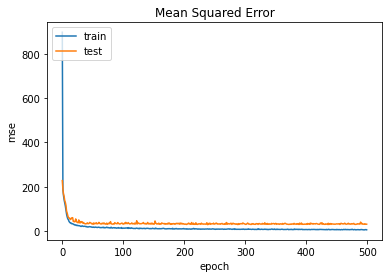

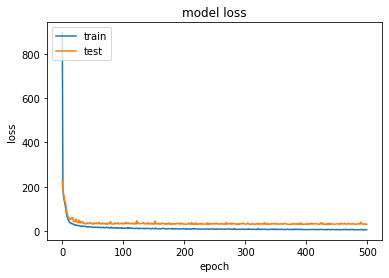

In [110]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(r.history['mse'])
plt.plot(r.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
df.loc[1000]

Cement (kg in a m^3 mixture)                141.90
Blast Furnace Slag (kg in a m^3 mixture)    166.60
Fly Ash (kg in a m^3 mixture)               129.70
Water (kg in a m^3 mixture)                 173.50
Superplasticizer (kg in a m^3 mixture)       10.90
Coarse Aggregate (kg in a m^3 mixture)      882.60
Fine Aggregate (kg in a m^3 mixture)        785.30
Age (day)                                    28.00
Concrete Compressive strength(MPa)           44.61
Name: 1000, dtype: float64

In [112]:
a=[[141.9,166.6,129.7,173.5,10.9,882.6,785.3,28]]
a=s.transform(a)
b=model.predict(a)
b

array([[44.493855]], dtype=float32)

In [129]:
y_pred1['y_pred']

0      16.990294
1      10.194449
2      37.032570
3      10.227082
4      34.198215
         ...    
253    26.879244
254    64.950623
255    12.350199
256    36.217220
257    40.186787
Name: y_pred, Length: 258, dtype: float32

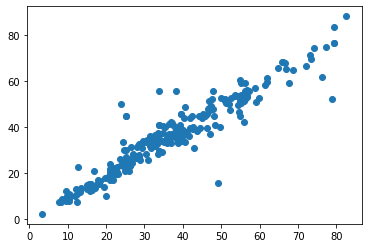

In [140]:
plt.scatter(result['y_test'],result['y_pred'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


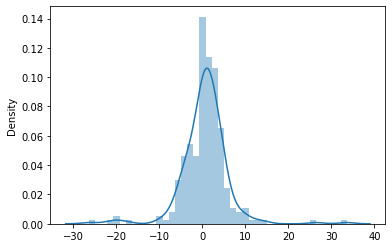

In [142]:
sns.distplot(result['y_test']-result['y_pred'])

# ANN_DROPOUT

In [148]:
model1 = Sequential()

model1.add(Dense(128,activation  = 'relu',input_dim =8))
model1.add(Dropout(0.3))
model1.add(Dense(64,activation  = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(32,activation  = 'relu'))
model1.add(Dense(16,activation  = 'relu'))
model1.add(Dense(1))

model1.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse'])
r1=model1.fit(X_train, y_train, epochs=500, batch_size=8,validation_data=(X_test,y_test))

Epoch 1/500
97/97 [==============================] - 0s 4ms/step - loss: 1084.1455 - mse: 1084.1455 - val_loss: 292.9752 - val_mse: 292.9752
Epoch 2/500
97/97 [==============================] - 0s 3ms/step - loss: 239.7568 - mse: 239.7568 - val_loss: 203.6640 - val_mse: 203.6640
Epoch 3/500
97/97 [==============================] - 0s 3ms/step - loss: 200.9953 - mse: 200.9953 - val_loss: 181.4426 - val_mse: 181.4426
Epoch 4/500
97/97 [==============================] - 0s 3ms/step - loss: 173.5240 - mse: 173.5240 - val_loss: 168.3555 - val_mse: 168.3555
Epoch 5/500
97/97 [==============================] - 0s 4ms/step - loss: 170.9331 - mse: 170.9331 - val_loss: 155.2581 - val_mse: 155.2581
Epoch 6/500
97/97 [==============================] - 0s 4ms/step - loss: 155.1432 - mse: 155.1432 - val_loss: 141.2170 - val_mse: 141.2170
Epoch 7/500
97/97 [==============================] - 0s 3ms/step - loss: 157.0186 - mse: 157.0186 - val_loss: 133.1642 - val_mse: 133.1642
Epoch 8/500
97/97 [======

In [149]:
y_pred_model1=model1.predict(X_test)
y_pred_model1

array([[15.858156 ],
       [12.328981 ],
       [27.142384 ],
       [12.400753 ],
       [32.649075 ],
       [65.79994  ],
       [18.261509 ],
       [50.133987 ],
       [35.358047 ],
       [20.200428 ],
       [33.355545 ],
       [12.946819 ],
       [35.475754 ],
       [32.941563 ],
       [13.079628 ],
       [27.659775 ],
       [36.49375  ],
       [56.65384  ],
       [54.14357  ],
       [33.95837  ],
       [23.988825 ],
       [47.65308  ],
       [15.897466 ],
       [53.87466  ],
       [60.61422  ],
       [47.18641  ],
       [37.10057  ],
       [34.569687 ],
       [40.041084 ],
       [12.95031  ],
       [41.4594   ],
       [50.738544 ],
       [25.26229  ],
       [22.140457 ],
       [40.699303 ],
       [37.919525 ],
       [17.952    ],
       [26.645187 ],
       [25.941896 ],
       [14.349875 ],
       [39.823368 ],
       [14.115097 ],
       [49.750267 ],
       [34.991486 ],
       [35.807724 ],
       [32.440807 ],
       [31.195711 ],
       [26.52

In [150]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_model1))

0.8980944054600329


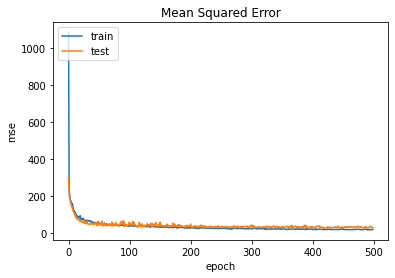

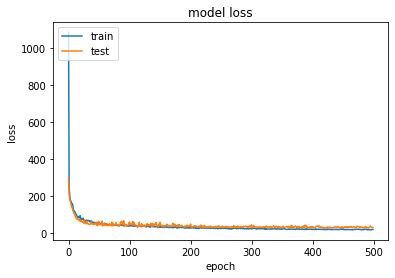

In [151]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(r1.history['mse'])
plt.plot(r1.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r1.history['loss'])
plt.plot(r1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ANN_DROPOUT_HYPERTUNING

In [27]:
from keras.wrappers.scikit_learn import KerasRegressor
def create_model():
  model = Sequential()
  model.add(Dense(128,activation  = 'relu',input_dim =8))
  model.add(Dropout(0.3))
  model.add(Dense(64,activation  = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(32,activation  = 'relu'))
  model.add(Dense(16,activation  = 'relu'))
  model.add(Dense(1))
  
  model.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse'])
  return model
model2 = KerasRegressor(build_fn=create_model, verbose=1)

In [46]:
from sklearn.model_selection import GridSearchCV
batch_size = [4, 8, 10, 20]
epochs = [100,500,700]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5)

# Run the GridSearchCV process
grid_result = grid.fit(X_train, y_train)

193/193 [==============================] - 0s 2ms/step - loss: 672.4703 - mse: 672.4703


In [47]:
print('Best params: ' + str(grid_result.best_params_))

Best params: {'batch_size': 4, 'nb_epoch': 100}


In [48]:
model_hyper = Sequential()

model_hyper.add(Dense(128,activation  = 'relu',input_dim =8))
model_hyper.add(Dropout(0.3))
model_hyper.add(Dense(64,activation  = 'relu'))
model_hyper.add(Dropout(0.3))
model_hyper.add(Dense(32,activation  = 'relu'))
model_hyper.add(Dense(16,activation  = 'relu'))
model_hyper.add(Dense(1))

model_hyper.compile(optimizer = "adam", loss = "mean_squared_error",metrics=['mse'])
r_hyper=model_hyper.fit(X_train, y_train, epochs=100, batch_size=4,validation_data=(X_test,y_test))

Epoch 1/100
193/193 [==============================] - 1s 3ms/step - loss: 609.7432 - mse: 609.7432 - val_loss: 203.5991 - val_mse: 203.5991
Epoch 2/100
193/193 [==============================] - 1s 3ms/step - loss: 186.9228 - mse: 186.9228 - val_loss: 178.5484 - val_mse: 178.5484
Epoch 3/100
193/193 [==============================] - 0s 3ms/step - loss: 187.0041 - mse: 187.0041 - val_loss: 152.8920 - val_mse: 152.8920
Epoch 4/100
193/193 [==============================] - 0s 3ms/step - loss: 166.9346 - mse: 166.9346 - val_loss: 136.7407 - val_mse: 136.7407
Epoch 5/100
193/193 [==============================] - 1s 3ms/step - loss: 145.6826 - mse: 145.6826 - val_loss: 134.7459 - val_mse: 134.7459
Epoch 6/100
193/193 [==============================] - 1s 3ms/step - loss: 135.5582 - mse: 135.5582 - val_loss: 117.0022 - val_mse: 117.0022
Epoch 7/100
193/193 [==============================] - 1s 3ms/step - loss: 119.6857 - mse: 119.6857 - val_loss: 99.1138 - val_mse: 99.1138
Epoch 8/100
193

In [49]:
y_pred_hyper=model_hyper.predict(X_test)
y_pred_hyper

array([[19.917461],
       [13.364802],
       [26.18985 ],
       [13.088524],
       [32.944077],
       [66.16313 ],
       [20.370564],
       [49.85993 ],
       [40.024944],
       [22.452225],
       [41.357464],
       [13.687755],
       [39.396606],
       [32.833637],
       [14.349291],
       [32.658848],
       [46.647945],
       [57.89526 ],
       [65.20931 ],
       [32.520245],
       [22.371662],
       [52.7934  ],
       [18.863401],
       [55.531036],
       [67.745735],
       [44.105   ],
       [37.93916 ],
       [32.146458],
       [40.484592],
       [14.786163],
       [51.339012],
       [56.039986],
       [25.558657],
       [24.900677],
       [40.21152 ],
       [39.828815],
       [15.46232 ],
       [28.677008],
       [30.247326],
       [17.215105],
       [38.220684],
       [16.879025],
       [50.31284 ],
       [35.863663],
       [34.160088],
       [33.193176],
       [33.92861 ],
       [29.319374],
       [39.64106 ],
       [53.73696 ],


In [50]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_hyper))

0.8854356026016671


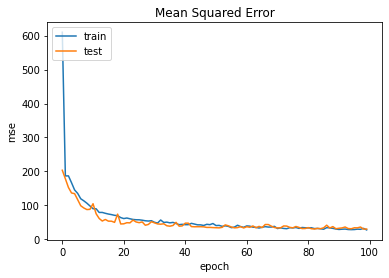

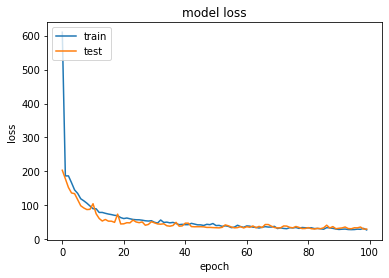

In [51]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(r_hyper.history['mse'])
plt.plot(r_hyper.history['val_mse'])
plt.title('Mean Squared Error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(r_hyper.history['loss'])
plt.plot(r_hyper.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
df.iloc[529]

Cement (kg in a m^3 mixture)                359.00
Blast Furnace Slag (kg in a m^3 mixture)     19.00
Fly Ash (kg in a m^3 mixture)               141.00
Water (kg in a m^3 mixture)                 154.00
Superplasticizer (kg in a m^3 mixture)       10.90
Coarse Aggregate (kg in a m^3 mixture)      942.00
Fine Aggregate (kg in a m^3 mixture)        801.00
Age (day)                                    56.00
Concrete Compressive strength(MPa)           68.75
Name: 529, dtype: float64

In [53]:
a=[[359,19,141,154,10.9,942,801,56]]
a=s.transform(a)
b=model_hyper.predict(a)
b

array([[65.93896]], dtype=float32)

In [55]:
y_test
y_test1=pd.DataFrame(y_test)

y_test1.columns=['y_test']
y_test1=y_test1.reset_index()
y_test1

,index,y_test
0,339,21.91
1,244,19.93
2,882,36.44
3,567,11.96
4,923,39.84
...,...,...
253,779,25.18
254,529,68.75
255,713,9.69
256,787,37.23


In [60]:
y_pred_hyper
y_pred_hyper1=pd.DataFrame(y_pred_hyper)
y_pred_hyper1.columns=['y_pred_hyper']
y_pred_hyper1['index1']=y_test1['index']
y_pred_hyper1

,y_pred_hyper,index1
0,19.917461,339
1,13.364802,244
2,26.189850,882
3,13.088524,567
4,32.944077,923
...,...,...
253,29.601685,779
254,65.938965,529
255,12.170091,713
256,37.941990,787


In [61]:
result1=pd.concat([y_test1,y_pred_hyper1],axis=1)
result1.drop('index1',axis=1)

,index,y_test,y_pred_hyper
0,339,21.91,19.917461
1,244,19.93,13.364802
2,882,36.44,26.189850
3,567,11.96,13.088524
4,923,39.84,32.944077
...,...,...,...
253,779,25.18,29.601685
254,529,68.75,65.938965
255,713,9.69,12.170091
256,787,37.23,37.941990


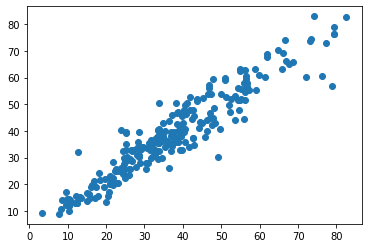

In [62]:
plt.scatter(result1['y_test'],result1['y_pred_hyper'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


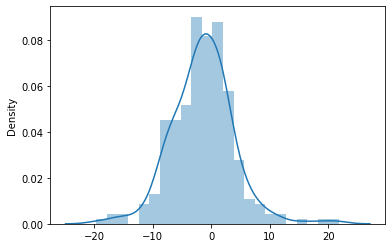

In [63]:
sns.distplot(result1['y_test']-result1['y_pred_hyper'])